### Imports

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras
import scipy
import seaborn as sb
import cv2
import os
from sklearn.utils import shuffle  
from sklearn.linear_model import LogisticRegression
from keras import backend as K
import tensorflow as tf
from sklearn.metrics import confusion_matrix

### Pre-processing

In [2]:
classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
testdir = 'seg_test'
traindir = 'seg_train'
size = (150, 150)

def getLabel(c):
    if c == 'buildings':
        label = 0
    elif c == 'forest':
        label = 1
    elif c == 'glacier': 
        label = 2
    elif c == 'mountain':
        label = 3
    elif c == 'sea':
        label = 4
    else:
        label = 5
    return label

def loadData(_dir, _classes):
    images = []
    labels = []
    for c in _classes:
        directory = _dir+'/'+c+'/'
        label = getLabel(c)
        for file in os.listdir(directory):
            img = cv2.imread(directory+'/'+file)
            img = cv2.resize(img, size)
            images.append(img)
            labels.append(label)
    # shuffle the data
    images, labels = shuffle(images, labels)
    images = np.array(images, dtype = 'float32') ### Our images
    labels = np.array(labels)
    return images,labels

train_img, train_lbl = loadData(traindir, classes)
test_img, test_lbl = loadData(testdir, classes)

forest 1
forest 1


In [11]:
train_img = train_img / 255.0 
test_img = test_img / 255.0

### Visualization

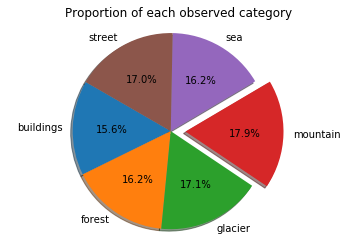

In [10]:
# Plot a pie chart
sizes = np.bincount(train_lbl)
explode = (0, 0, 0, 0.15, 0, 0)  
labels = 'buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.title('Proportion of each observed category')

plt.show()

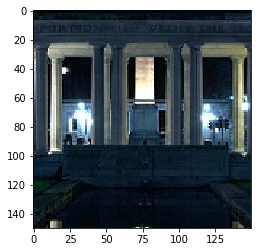

In [14]:
index = np.random.randint(train_img.shape[0])
plt.figure()
plt.imshow(train_img[index])
plt.show()

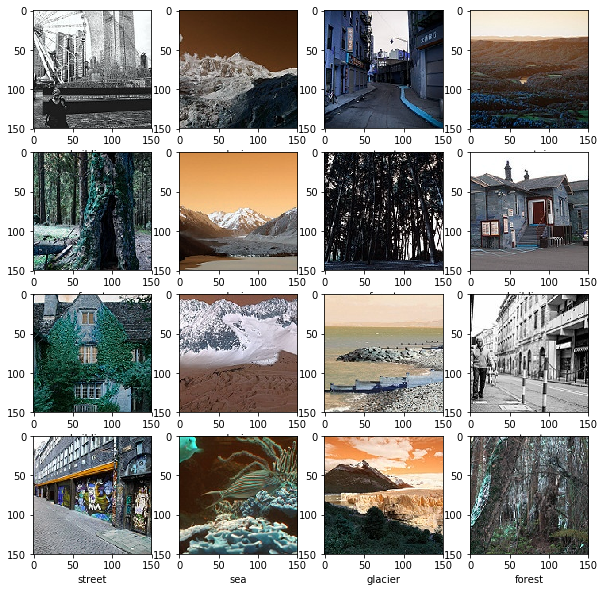

In [16]:
fig = plt.figure(figsize=(10,10))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(train_img[i])
    plt.xlabel(classes[train_lbl[i]])

### Keras CNN

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), # the nn will learn the good filter to use
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_img, train_lbl, batch_size=128, epochs=5, validation_split = 0.2)

test_loss = model.evaluate(test_img, test_lbl)

print test_loss

Train on 11227 samples, validate on 2807 samples
Epoch 1/5
11227/11227 [==============================] - 645s 57ms/sample - loss: 9.3878 - acc: 0.3283 - val_loss: 1.5236 - val_acc: 0.3986
Epoch 2/5
11227/11227 [==============================] - 596s 53ms/sample - loss: 1.1176 - acc: 0.6029 - val_loss: 0.8319 - val_acc: 0.6979
Epoch 3/5
11227/11227 [==============================] - 589s 52ms/sample - loss: 0.5233 - acc: 0.8236 - val_loss: 0.8031 - val_acc: 0.7171
Epoch 4/5
11227/11227 [==============================] - 566s 50ms/sample - loss: 0.2092 - acc: 0.9368 - val_loss: 0.8723 - val_acc: 0.7339
Epoch 5/5
3000/3000 [==============================] - 37s 12ms/sample - loss: 0.8953 - acc: 0.7390
[0.8952886252403259, 0.739]


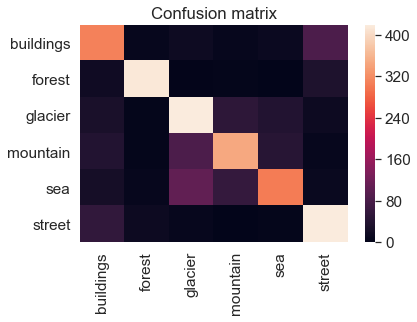

In [37]:
CM = confusion_matrix(test_lbl, pred_lbl)
ax = plt.axes()
sb.set(font_scale=1.4)
sb.heatmap(CM, annot=False,annot_kws={"size": 16},  xticklabels=classes, yticklabels=classes, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [52]:
x = sum(pred_lbl == test_lbl)
y = 1.0*test_lbl.shape[0]
print 'y',y
print 'x', x
print(x/y)

y 3000.0
x 2217
0.739
